In [1]:
import pandas as pd

In [2]:
dfifa = pd.read_csv('new_rank.csv',index_col = "Rank")
dfifa.head()
# help(pd.read_csv)

,Country,Point,Prev_Point,country,confederation,population_share,tv_audience_share,gdp_weighted_share
Rank,,,,,,,,
1,Belgium,1746,1746,Belgium,UEFA,0.2,0.3,0.7
2,Brazil,1726,1681,Brazil,CONMEBOL,2.8,7.1,5.4
3,France,1718,1718,France,UEFA,0.9,2.0,4.0
5,Uruguay,1637,1615,Uruguay,CONMEBOL,0.0,0.1,0.1
6,Portugal,1631,1631,Portugal,UEFA,0.2,0.4,0.5


In [3]:
dfifa.iloc[1:6,:1]

,Country
Rank,
2,Brazil
3,France
5,Uruguay
6,Portugal
7,Croatia


In [4]:
dfifa.isna().sum()

Country               0
Point                 0
Prev_Point            0
country               0
confederation         0
population_share      0
tv_audience_share     0
gdp_weighted_share    0
dtype: int64

In [5]:
dfifa.describe()

,Point,Prev_Point,population_share,tv_audience_share,gdp_weighted_share
count,164.00000,164.000000,164.000000,164.000000,164.000000
mean,1238.29878,1235.743902,0.436585,0.454268,0.434756
std,227.43888,223.051196,1.460398,1.025524,1.149265
min,855.00000,855.000000,0.000000,0.000000,0.000000
25%,1055.75000,1055.750000,0.000000,0.000000,0.000000
50%,1228.50000,1221.500000,0.100000,0.100000,0.000000
75%,1429.00000,1408.750000,0.400000,0.300000,0.325000
max,1746.00000,1746.000000,17.600000,7.100000,9.100000


In [6]:
dfifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 1 to 210
Data columns (total 8 columns):
Country               164 non-null object
Point                 164 non-null int64
Prev_Point            164 non-null int64
country               164 non-null object
confederation         164 non-null object
population_share      164 non-null float64
tv_audience_share     164 non-null float64
gdp_weighted_share    164 non-null float64
dtypes: float64(3), int64(2), object(3)
memory usage: 11.5+ KB


In [7]:
dfifa.columns

Index(['Country', 'Point', 'Prev_Point', 'country', 'confederation',
       'population_share', 'tv_audience_share', 'gdp_weighted_share'],
      dtype='object')

In [8]:
dfifa.confederation.value_counts().plot(kind = 'bar')

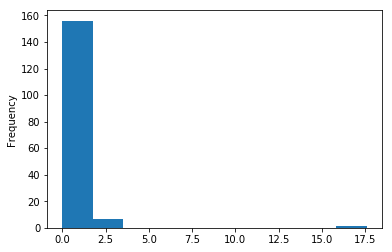

In [9]:
import matplotlib.pyplot as plt
dfifa.population_share.plot('hist')
plt.show()

In [10]:
dfifa.loc[dfifa.population_share > 10]

,Country,Point,Prev_Point,country,confederation,population_share,tv_audience_share,gdp_weighted_share
Rank,,,,,,,,
103,India,1214,1219,India,AFC,17.6,2.0,0.5


In [17]:
dfifa = dfifa.drop(['Country','Prev_Point'],axis = 1)

KeyError: "['Country' 'Prev_Point'] not found in axis"

In [18]:
#dir(dfifa)
dfifa.columns

Index(['Point', 'country', 'confederation', 'population_share',
       'tv_audience_share', 'gdp_weighted_share'],
      dtype='object')

In [20]:

import statistics as st
import numpy as np
dfifa.loc[:,np.logical_and(dfifa.columns != 'country',dfifa.columns != 'confederation')].apply(lambda x : st.mean(x))

Point                 1238.298780
population_share         0.436585
tv_audience_share        0.454268
gdp_weighted_share       0.434756
dtype: float64

In [21]:
dfifa.astype({'country':'str'}).dtypes

Point                   int64
country                object
confederation          object
population_share      float64
tv_audience_share     float64
gdp_weighted_share    float64
dtype: object

In [22]:
dfifa.index

Int64Index([  1,   2,   3,   5,   6,   7,   8,   9,  10,  11,
            ...
            192, 194, 197, 200, 202, 202, 204, 204, 207, 210],
           dtype='int64', name='Rank', length=164)

In [23]:
dfifa.iloc[-5:,:]

,Point,country,confederation,population_share,tv_audience_share,gdp_weighted_share
Rank,,,,,,
202,868,Eritrea,CAF,0.1,0.0,0.0
204,867,Cayman Islands,CONCACAF,0.0,0.0,0.0
204,867,Pakistan,AFC,2.5,0.4,0.1
207,862,Tonga,OFC,0.0,0.0,0.0
210,855,Bahamas,CONCACAF,0.0,0.0,0.0


In [24]:
from string import ascii_lowercase
l = []
for i in ascii_lowercase:
    for j in range(1,10):
        if(len(l) == 191):
            break
        l.append(i + str(j))
print(len(l))

191


In [26]:
#dfifa.index = l

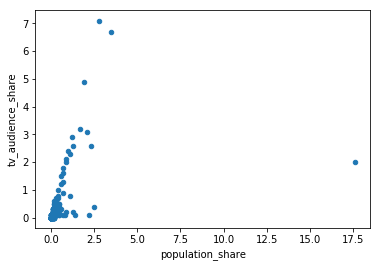

In [27]:
dfifa.plot(kind = 'scatter',x = 'population_share',y=  'tv_audience_share')
plt.show()

In [28]:
dfifa.confederation.unique()

array(['UEFA', 'CONMEBOL', 'CONCACAF', 'CAF', 'AFC', 'OFC'], dtype=object)

In [29]:
dfifa.dropna(how = 'all')
dfifa['country'] = dfifa['country'].str.upper()
dfifa.iloc[:5,:]

,Point,country,confederation,population_share,tv_audience_share,gdp_weighted_share
Rank,,,,,,
1,1746,BELGIUM,UEFA,0.2,0.3,0.7
2,1726,BRAZIL,CONMEBOL,2.8,7.1,5.4
3,1718,FRANCE,UEFA,0.9,2.0,4.0
5,1637,URUGUAY,CONMEBOL,0.0,0.1,0.1
6,1631,PORTUGAL,UEFA,0.2,0.4,0.5


In [30]:
dfifa.loc[dfifa.confederation == 'AFC','population_share'].sum()

36.8

In [31]:
#df_numeric = dfifa.drop('country',axis  = 1)
dfifa.groupby('confederation').sum()

,Point,population_share,tv_audience_share,gdp_weighted_share
confederation,,,,
AFC,39892,36.8,24.5,19.6
CAF,55014,14.5,8.2,2.5
CONCACAF,25002,3.2,5.3,4.4
CONMEBOL,15390,5.6,13.5,10.3
OFC,8777,0.2,0.2,0.1
UEFA,59006,11.3,22.8,34.4


In [34]:
dfifa.corr()

,Point,population_share,tv_audience_share,gdp_weighted_share
Point,1.000000,0.066442,0.341067,0.414074
population_share,0.066442,1.000000,0.418827,0.232152
tv_audience_share,0.341067,0.418827,1.000000,0.818018
gdp_weighted_share,0.414074,0.232152,0.818018,1.000000
